In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Part 1 – Basic Data Understanding (Pandas)

In [ ]:
df = pd.read_csv("C:/Users/varsh/Downloads/kroger_members.csv")

print("Head:\n", df.head(10))
print("\nShape:", df.shape)
print("\nColumn Names:",df.columns)
print("\nData Types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())
print("\nDuplicated rows:", df.duplicated().sum())
print("\nHas member card counts:\n", df["has_member_card"].value_counts())
print("\nNull values again:\n", df.isnull().sum())

Head:
    kroger_id has_member_card
0          1               Y
1          2               Y
2          3             NaN
3          4               Y
4          5             NaN
5          6               Y
6          7             NaN
7          8               Y
8          9               Y
9         10               Y

Shape: (100, 2)

Column Names: Index(['kroger_id', 'has_member_card'], dtype='object')

Data Types:
 kroger_id           int64
has_member_card    object
dtype: object

Null values:
 kroger_id           0
has_member_card    37
dtype: int64

Duplicated rows: 0

Has member card counts:
 has_member_card
Y    63
Name: count, dtype: int64

Null values again:
 kroger_id           0
has_member_card    37
dtype: int64
    kroger_id has_member_card
95         96               Y
96         97             NaN
97         98               Y
98         99             NaN
99        100             NaN


Part 2 – Data Cleaning

In [7]:
df["has_member_card"] = df["has_member_card"].replace(0, "N")  #Standardize has_member_card values so that:'Y' stays as 'Y',Missing values become 'N'

df["kroger_id"] = df["kroger_id"].astype(int)        #Ensure all kroger_id values are integers and unique.
df = df.drop_duplicates(subset="kroger_id")

invalid_IDs = df[df["kroger_id"] < 0]

if not invalid_IDs.empty:
    print("Invalid kroger id found:")                     #Check for any negative or invalid IDs.
    print(invalid_IDs)
else:
    print("No negative or invalid kroger id found.")

df = df.reset_index(drop=True)             #Reset DataFrame index after cleaning.


No negative or invalid kroger id found.


Part 3 – Exploratory Data Analysis (EDA)

In [14]:
total_customers = df['kroger_id'].nunique()
print("Total number of customers:", total_customers)

df["has_member_card"] = df["has_member_card"].replace('Y',1) 
df["has_member_card"] = df["has_member_card"].replace(np.nan, 0)

members = (df["has_member_card"] == 1).sum()
non_members = (df["has_member_card"] == 0).sum()

print("Total Members:", members)
print("Total Non-members:", non_members)




Total number of customers: 100
Total Members: 63
Total Non-members: 37


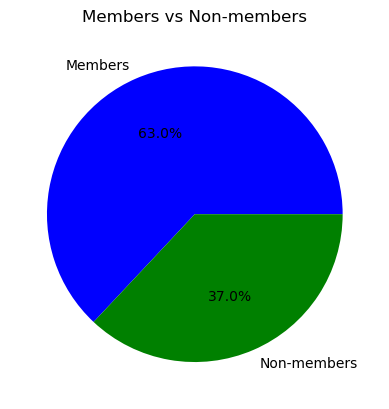

In [20]:
plt.pie([members, non_members], labels=['Members', 'Non-members'], autopct='%1.1f%%', colors=['blue', 'green'] )
plt.title("Members vs Non-members")
plt.show()

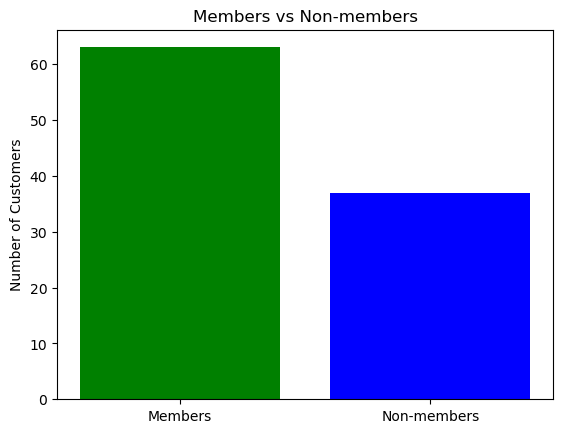

In [21]:
plt.bar(['Members', 'Non-members'],[members, non_members] , color=['green', 'blue'])
plt.title("Members vs Non-members")
plt.ylabel("Number of Customers")
plt.show()


Part 4 – Statistics

In [22]:


print("Mean=",np.mean(df["has_member_card"]))
print("Median=",np.median(df['has_member_card']))
print("mode=",df['has_member_card'].mode()[0])

print("prob of yes=",df["has_member_card"].mean())
print("prob of no=",1-df["has_member_card"].mean())

Mean= 0.63
Median= 1.0
mode= 1.0
prob of yes= 0.63
prob of no= 0.37


Part 5 – Linear Algebra & NumPy


In [12]:
bin_array=df["has_member_card"].values
print(bin_array)

n=bin_array.size
spendscore=np.random.seed(0)
spendscore=np.random.randint(1,101,n)
print(spendscore)

add=np.add(bin_array,spendscore)
print(add)

dot=np.dot(bin_array,spendscore)
print(dot)

bin_array=np.array(bin_array)
spendscore=np.array(spendscore)
new=np.vstack((bin_array,spendscore))
print(new)
weights=np.array([0.5,0.5])

matmul=weights @ new # as per the mul rule to mul weight comes first
print(matmul)

[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0.]
[ 45  48  65  68  68  10  84  22  37  88  71  89  89  13  59  66  40  88
  47  89  82  38  26  78  73  10  21  81  70  80  48  65  83 100  89  50
  30  20  20  15  40  33  66  10  58  33  32  75  24  36  76  56  29  35
   1   1  37  54   6  39  18  80   5  43  59  32   2  66  42  58  36  12
  47  83  92   1  15 100  54  13  43  85  76  69   7  69  48   4  77  53
  79  16  21 100  59  24  80  14  86  49]
[ 46.  49.  65.  69.  68.  11.  84.  23.  38.  89.  71.  89.  90.  13.
  59.  67.  40.  89.  48.  89.  83.  38.  27.  79.  73.  11.  21.  82.
  70.  81.  48.  66.  84. 101.  90.  51.  30.  20.  20.  16.  41.  34.
  66.  11.  58.  34.  32.  76.  25.  37.  77.  56.  30.  36.   2.   2.
  3

Part 6 – Feature Engineering


In [23]:
df["has_member_card"]=df["has_member_card"].replace(0,"N")
df["has_member_card"]=df["has_member_card"].replace(1,"Y")
df.head()
df["Is_Member"]=df["has_member_card"].apply(lambda x: 1 if x=="Y" else 0)
df["Monthly_Spend"]=np.random.seed(0)
df["Monthly_Spend"]=np.random.randint(50,500,100)

df["Discount_Eligible"]=(df["Is_Member"].apply(lambda x: 1 if x==1 else 0) & df["Monthly_Spend"].apply(lambda x: 1 if x>200 else 0) )
print(df.head())

q1=df["Monthly_Spend"].quantile(0.25)
q2=df["Monthly_Spend"].quantile(0.50)
q3=df["Monthly_Spend"].quantile(0.75)
q4=df["Monthly_Spend"].quantile(1.0)
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("Q4=",q4)

   kroger_id has_member_card  Is_Member  Monthly_Spend  Discount_Eligible
0          1               Y          1            222                  1
1          2               Y          1             97                  0
2          3               N          0            167                  0
3          4               Y          1            242                  1
4          5               N          0            373                  0
Q1= 153.5
Q2= 252.5
Q3= 383.5
Q4= 499.0


Part 7 – SQL Simulation in Pandas

In [24]:
selecteddf=df[(df["Is_Member"]==1) & (df["Monthly_Spend"]>300)]
print(selecteddf)


    kroger_id has_member_card  Is_Member  Monthly_Spend  Discount_Eligible
5           6               Y          1            301                  1
7           8               Y          1            409                  1
12         13               Y          1            342                  1
17         18               Y          1            364                  1
23         24               Y          1            387                  1
29         30               Y          1            454                  1
33         34               Y          1            385                  1
34         35               Y          1            481                  1
35         36               Y          1            498                  1
40         41               Y          1            335                  1
43         44               Y          1            448                  1
45         46               Y          1            338                  1
47         48            

In [ ]:
top_10_spenders=df[df["Is_Member"] == 1].sort_values(by="Monthly_Spend", ascending=False).head(10)
print(top_10_spenders)


    kroger_id has_member_card  Is_Member  Monthly_Spend  Discount_Eligible
35         36               Y          1            498                  1
72         73               Y          1            492                  1
34         35               Y          1            481                  1
83         84               Y          1            480                  1
92         93               Y          1            476                  1
77         78               Y          1            475                  1
62         63               Y          1            470                  1
29         30               Y          1            454                  1
43         44               Y          1            448                  1
87         88               Y          1            448                  1


In [25]:
sorted_df=df.sort_values(by=["Monthly_Spend", "kroger_id"], ascending=[False, True],inplace =True)
print(sorted_df)

None


In [26]:
counts = df["Discount_Eligible"].value_counts()
print(counts)


Discount_Eligible
0    59
1    41
Name: count, dtype: int64


Part 8 – Insights

In [27]:
percent=total_customers = len(df)
member_count = (df["Is_Member"] == 1).sum()

percentage_members = (member_count / total_customers) * 100
print(f"Percentage of members: {percentage_members:.2f}%")


Percentage of members: 63.00%


In [ ]:

avg_spend_members=df[df["Is_Member"]==1]["Monthly_Spend"].mean()
avg_spend_nonmembers=df[df["Is_Member"]==0]["Monthly_Spend"].mean()

print(f"Average monthly spend for members: {avg_spend_members:.2f}")
print(f"Average monthly spend for non-members: {avg_spend_nonmembers:.2f}")

difference= 499.0-153.5
print(f"Difference between Q4 and Q1: {difference:.2f}")

threshold = df["Monthly_Spend"].quantile(0.75)
high_spenders = df[df["Monthly_Spend"] >= threshold]
all_members = high_spenders["Is_Member"].min() == 1
print("Are all high spenders members?", all_members)




Average monthly spend for members: 272.21
Average monthly spend for non-members: 266.32
Difference between Q4 and Q1: 345.50
Are all high spenders members? False


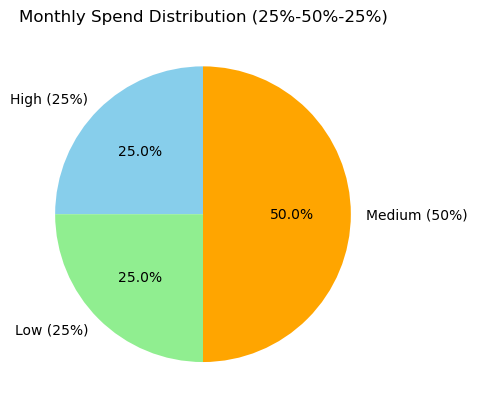

In [41]:


df["Spend_Category"] = df["Monthly_Spend"].apply(categorize_spend)


category_counts = df["Spend_Category"].value_counts().sort_index()

plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'orange']
)
plt.title("Monthly Spend Distribution (25%-50%-25%)")
plt.show()
